In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LogisticRegression
from functools import reduce

plt.style.use('fivethirtyeight')

In [2]:
players = pd.read_csv('player_data_v1.csv')

In [3]:
players.head()

,name,year_start,year_end,position,height_ft,height_inches,inches,height in cm,weight in lbs,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6.0,10.0,82,208.28,240.0,24-Jun-68,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6.0,9.0,81,205.74,235.0,7-Apr-46,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7.0,2.0,86,218.44,225.0,16-Apr-47,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6.0,1.0,73,185.42,162.0,9-Mar-69,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6.0,6.0,78,198.12,223.0,3-Nov-74,San Jose State University


In [4]:
players = players.drop(['height_ft', 'height_inches', 'inches', 'birth_date', 'college'], axis = 1)

In [5]:
players.rename(columns={'height in cm': 'height', 'weight in lbs': 'weight'}, inplace = True)
players.head()

,name,year_start,year_end,position,height,weight
0,Alaa Abdelnaby,1991,1995,F-C,208.28,240.0
1,Zaid Abdul-Aziz,1969,1978,C-F,205.74,235.0
2,Kareem Abdul-Jabbar,1970,1989,C,218.44,225.0
3,Mahmoud Abdul-Rauf,1991,2001,G,185.42,162.0
4,Tariq Abdul-Wahad,1998,2003,F,198.12,223.0


In [6]:
players.corr()

,year_start,year_end,height,weight
year_start,1.000000,0.978783,0.304440,0.361641
year_end,0.978783,1.000000,0.319640,0.371104
height,0.304440,0.319640,1.000000,0.827183
weight,0.361641,0.371104,0.827183,1.000000


In [7]:
players.describe()

,year_start,year_end,height,weight
count,4550.000000,4550.000000,4550.000000,4544.000000
mean,1985.076264,1989.272527,198.297521,208.908011
std,20.974188,21.874761,9.753603,26.268662
min,1947.000000,1947.000000,0.000000,114.000000
25%,1969.000000,1973.000000,190.500000,190.000000
50%,1986.000000,1992.000000,198.120000,210.000000
75%,2003.000000,2009.000000,205.740000,225.000000
max,2018.000000,2018.000000,231.140000,360.000000


In [8]:
players[players['height'] == 0]

,name,year_start,year_end,position,height,weight
2142,George Karl,1974,1978,NaN,0.0,NaN


In [9]:
invalid_data = players[players['height'] == 0].index
players.drop(invalid_data, inplace = True)

,year_start,year_end,height,weight
count,4549.000000,4549.000000,4549.000000,4544.000000
mean,1985.078699,1989.275005,198.341112,208.908011
std,20.975851,21.876527,9.300850,26.268662
min,1947.000000,1947.000000,160.020000,114.000000
25%,1969.000000,1973.000000,190.500000,190.000000
50%,1986.000000,1992.000000,198.120000,210.000000
75%,2003.000000,2009.000000,205.740000,225.000000
max,2018.000000,2018.000000,231.140000,360.000000


In [10]:
players.isna().sum()

name          0
year_start    0
year_end      0
position      0
height        0
weight        5
dtype: int64

In [11]:
players = players.dropna()

In [12]:
players.isna().sum()

name          0
year_start    0
year_end      0
position      0
height        0
weight        0
dtype: int64

In [14]:
players.describe()

,year_start,year_end,height,weight
count,4544.000000,4544.000000,4544.000000,4544.000000
mean,1985.113116,1989.313820,198.347504,208.908011
std,20.960241,21.855893,9.295967,26.268662
min,1947.000000,1947.000000,160.020000,114.000000
25%,1969.000000,1973.000000,190.500000,190.000000
50%,1986.500000,1992.000000,198.120000,210.000000
75%,2003.000000,2009.000000,205.740000,225.000000
max,2018.000000,2018.000000,231.140000,360.000000


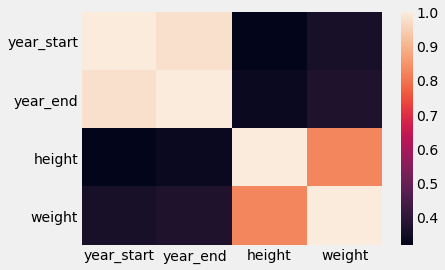

In [15]:
dataplot = sb.heatmap(players.corr())

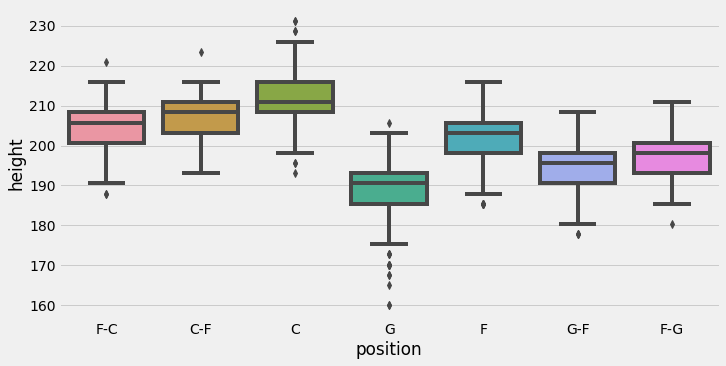

In [17]:
sb.catplot(x="position", y="height", kind="box", data = players, height = 5, aspect = 2);

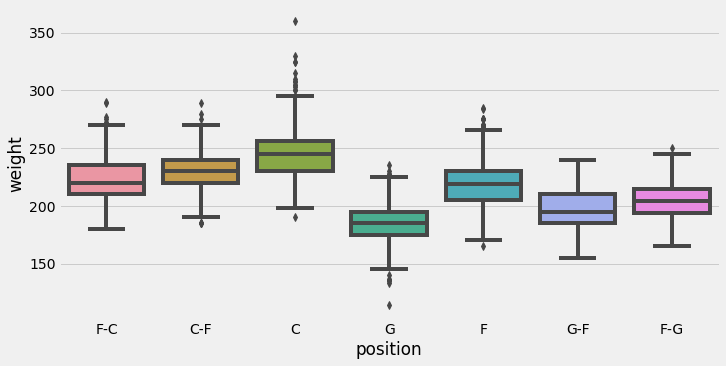

In [18]:
sb.catplot(x="position", y="weight", kind="box", data = players, height = 5, aspect = 2);

In [22]:
players_c = players[players['position'] == 'C']
players_c.head()

,name,year_start,year_end,position,height,weight
2,Kareem Abdul-Jabbar,1970,1989,C,218.44,225.0
21,Steven Adams,2014,2018,C,215.90,255.0
32,Alexis Ajinca,2009,2017,C,218.44,248.0
35,Solomon Alabi,2011,2012,C,215.90,251.0
37,Gary Alcorn,1960,1961,C,205.74,225.0


<AxesSubplot:xlabel='year_start', ylabel='height'>

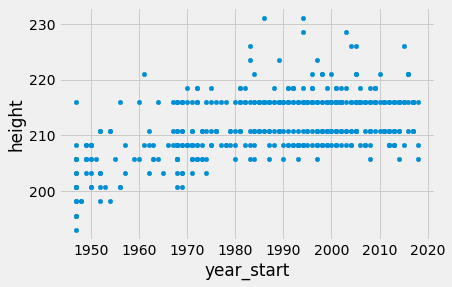

In [23]:
players_c.plot(x = 'year_start', y = 'height', kind = 'scatter')

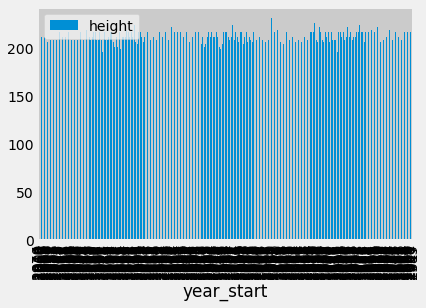

In [24]:
players_c.plot(x = 'year_start', y = 'height', kind = 'bar');

In [25]:
players_1950 = players[players['year_start'] < 1960]
players_1950.head()

,name,year_start,year_end,position,height,weight
7,Forest Able,1957,1957,G,190.50,180.0
8,John Abramovic,1947,1948,F,190.50,195.0
11,Don Ackerman,1954,1954,G,185.42,183.0
101,Don Anielak,1955,1955,F,200.66,190.0
121,Paul Arizin,1951,1962,F-G,193.04,190.0


In [26]:
players_1960 = players[players['year_start'].between(1960, 1969)]
players_1960.head()

,name,year_start,year_end,position,height,weight
1,Zaid Abdul-Aziz,1969,1978,C-F,205.74,235.0
13,Bud Acton,1968,1968,F,198.12,210.0
24,Rick Adelman,1969,1975,G,185.42,175.0
31,Matthew Aitch,1968,1968,F,200.66,230.0
33,Henry Akin,1967,1969,C-F,208.28,225.0


In [27]:
players_1970 = players[players['year_start'].between(1970, 1979)]
players_1970.head()

,name,year_start,year_end,position,height,weight
2,Kareem Abdul-Jabbar,1970,1989,C,218.44,225.0
6,Tom Abernethy,1977,1981,F,200.66,220.0
15,Alvan Adams,1976,1988,C-F,205.74,210.0
16,Don Adams,1971,1977,F,198.12,210.0
17,George Adams,1973,1975,F-G,195.58,210.0


In [28]:
players_1980 = players[players['year_start'].between(1980, 1989)]
players_1980.head()

,name,year_start,year_end,position,height,weight
12,Mark Acres,1988,1993,F-C,210.82,220.0
20,Michael Adams,1986,1996,G,177.80,162.0
22,Rafael Addison,1987,1997,F-G,200.66,215.0
28,Mark Aguirre,1982,1994,F-G,198.12,232.0
30,Danny Ainge,1982,1995,G,193.04,175.0


In [29]:
players_1990 = players[players['year_start'].between(1990, 1999)]
players_1990.head()

,name,year_start,year_end,position,height,weight
0,Alaa Abdelnaby,1991,1995,F-C,208.28,240.0
3,Mahmoud Abdul-Rauf,1991,2001,G,185.42,162.0
4,Tariq Abdul-Wahad,1998,2003,F,198.12,223.0
5,Shareef Abdur-Rahim,1997,2008,F,205.74,225.0
43,Cory Alexander,1996,2005,G,185.42,185.0


In [30]:
players_2000 = players[players['year_start'].between(2000, 2009)]
players_2000.head()

,name,year_start,year_end,position,height,weight
10,Alex Acker,2006,2009,G,195.58,185.0
18,Hassan Adams,2007,2009,G,193.04,220.0
26,Arron Afflalo,2008,2018,G,195.58,210.0
27,Maurice Ager,2007,2011,G,195.58,202.0
29,Blake Ahearn,2008,2012,G,187.96,190.0


In [31]:
players_2010 = players[players['year_start'].between(2010, 2019)]
players_2010.head()

,name,year_start,year_end,position,height,weight
9,Alex Abrines,2017,2018,G-F,198.12,190.0
14,Quincy Acy,2013,2018,F,200.66,240.0
19,Jordan Adams,2015,2016,G,195.58,209.0
21,Steven Adams,2014,2018,C,215.90,255.0
23,Bam Adebayo,2018,2018,C-F,208.28,243.0


In [34]:
players_2010.describe()

,year_start,year_end,height,weight
count,695.000000,695.000000,695.000000,695.000000
mean,2014.257554,2016.503597,200.477266,217.844604
std,2.544389,2.109311,8.948836,26.282581
min,2010.000000,2010.000000,175.260000,150.000000
25%,2012.000000,2015.000000,193.040000,200.000000
50%,2014.000000,2018.000000,200.660000,215.000000
75%,2017.000000,2018.000000,208.280000,235.500000
max,2018.000000,2018.000000,226.060000,360.000000


In [33]:
players_1950.describe()

,year_start,year_end,height,weight
count,675.000000,675.000000,675.000000,675.000000
mean,1950.882963,1952.980741,191.704148,192.645926
std,3.598086,5.213932,7.521568,18.941906
min,1947.000000,1947.000000,167.640000,137.000000
25%,1948.000000,1949.000000,185.420000,180.000000
50%,1950.000000,1951.000000,190.500000,190.000000
75%,1954.000000,1956.000000,195.580000,205.000000
max,1959.000000,1973.000000,215.900000,245.000000


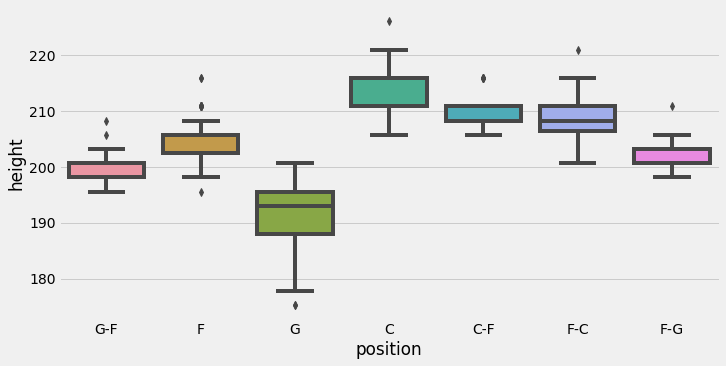

In [35]:
sb.catplot(x="position", y="height", kind="box", data = players_2010, height = 5, aspect = 2);

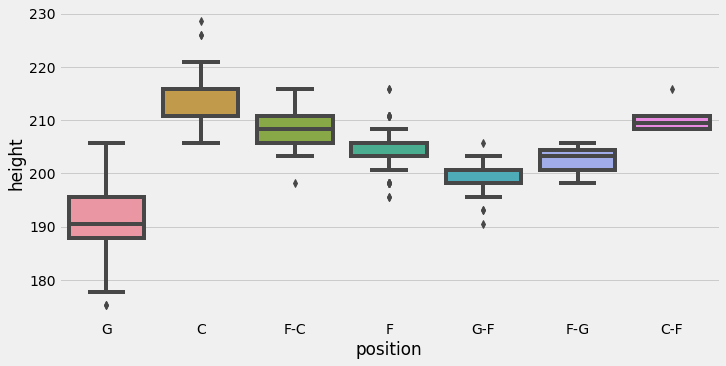

In [36]:
sb.catplot(x="position", y="height", kind="box", data = players_2000, height = 5, aspect = 2);

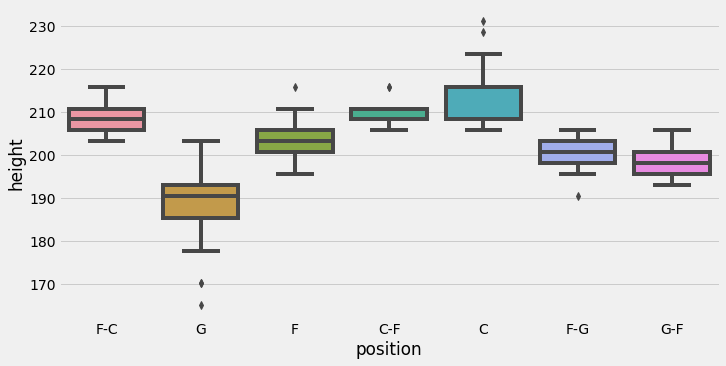

In [37]:
sb.catplot(x="position", y="height", kind="box", data = players_1990, height = 5, aspect = 2);

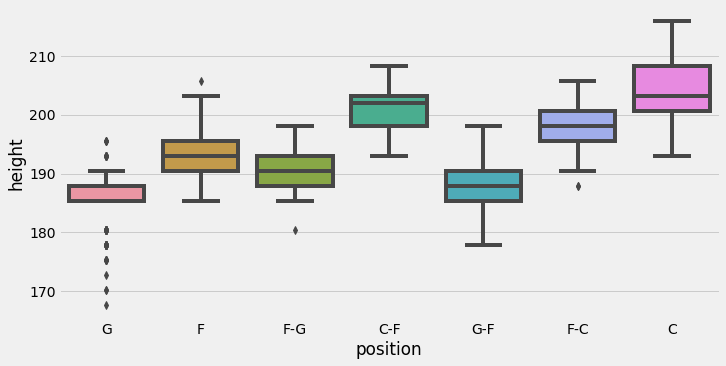

In [38]:
sb.catplot(x="position", y="height", kind="box", data = players_1950, height = 5, aspect = 2);

In [39]:
players.groupby('position').height.mean()

position
C      212.029040
C-F    207.154977
F      201.558557
F-C    204.633660
F-G    196.991111
G      189.583855
G-F    194.796833
Name: height, dtype: float64

In [40]:
players_1960_1 = players_1960.groupby('position').height.mean().reset_index()
players_1960_1.head()

,position,height
0,C,209.198723
1,C-F,205.195714
2,F,199.038308
3,F-C,202.303529
4,F-G,195.862222


In [41]:
players_1960_2 = players_1960.groupby('position').weight.mean().reset_index()
players_1960_2.head()

,position,weight
0,C,229.702128
1,C-F,224.285714
2,F,209.676923
3,F-C,218.705882
4,F-G,203.481481


In [42]:
players_1960_hw = pd.merge(players_1960_1, players_1960_2, on ="position")
players_1960_hw.columns = ["position", "height_1960", "weight_1960"]
players_1960_hw

,position,height_1960,weight_1960
0,C,209.198723,229.702128
1,C-F,205.195714,224.285714
2,F,199.038308,209.676923
3,F-C,202.303529,218.705882
4,F-G,195.862222,203.481481
5,G,187.812516,182.458065
6,G-F,193.357500,196.625000


In [43]:
players_1950_1 = players_1950.groupby('position').height.mean().reset_index()

players_1950_2 = players_1950.groupby('position').weight.mean().reset_index()

players_1950_hw = pd.merge(players_1950_1, players_1950_2, on ="position")
players_1950_hw.columns = ["position", "height_1950", "weight_1950"]
players_1950_hw

,position,height_1950,weight_1950
0,C,204.046667,222.254902
1,C-F,201.083333,214.062500
2,F,193.171948,195.863636
3,F-C,197.444810,205.075949
4,F-G,190.631379,190.672414
5,G,185.009495,177.348485
6,G-F,187.434483,182.620690


In [44]:
players_1970_1 = players_1970.groupby('position').height.mean().reset_index()

players_1970_2 = players_1970.groupby('position').weight.mean().reset_index()

players_1970_hw = pd.merge(players_1970_1, players_1970_2, on ="position")
players_1970_hw.columns = ["position", "height_1970", "weight_1970"]
players_1970_hw

,position,height_1970,weight_1970
0,C,210.312000,229.781818
1,C-F,207.721200,223.100000
2,F,200.208731,209.791878
3,F-C,204.077455,214.963636
4,F-G,197.986316,201.815789
5,G,188.973909,181.522634
6,G-F,194.972609,190.782609


In [45]:
players_1980_1 = players_1980.groupby('position').height.mean().reset_index()

players_1980_2 = players_1980.groupby('position').weight.mean().reset_index()

players_1980_hw = pd.merge(players_1980_1, players_1980_2, on ="position")
players_1980_hw.columns = ["position", "height_1980", "weight_1980"]
players_1980_hw

,position,height_1980,weight_1980
0,C,213.940571,238.600000
1,C-F,211.193529,232.794118
2,F,202.973214,215.458333
3,F-C,206.881159,223.449275
4,F-G,199.420976,205.682927
5,G,190.415735,183.497630
6,G-F,197.872195,197.756098


In [46]:
players_1990_1 = players_1990.groupby('position').height.mean().reset_index()

players_1990_2 = players_1990.groupby('position').weight.mean().reset_index()

players_1990_hw = pd.merge(players_1990_1, players_1990_2, on ="position")
players_1990_hw.columns = ["position", "height_1990", "weight_1990"]
players_1990_hw

,position,height_1990,weight_1990
0,C,213.436200,253.890000
1,C-F,209.832222,244.722222
2,F,203.319811,226.132075
3,F-C,208.330800,233.120000
4,F-G,200.901905,212.714286
5,G,189.780333,187.366667
6,G-F,197.696667,206.020833


In [47]:
players_2000_1 = players_2000.groupby('position').height.mean().reset_index()

players_2000_2 = players_2000.groupby('position').weight.mean().reset_index()

players_2000_hw = pd.merge(players_2000_1, players_2000_2, on ="position")
players_2000_hw.columns = ["position", "height_2000", "weight_2000"]
players_2000_hw

,position,height_2000,weight_2000
0,C,214.390377,256.849057
1,C-F,209.912857,251.428571
2,F,204.527727,231.390909
3,F-C,208.824286,246.714286
4,F-G,202.861333,216.666667
5,G,191.443429,195.155102
6,G-F,198.984681,211.276596


In [68]:
players_2010_1 = players_2010.groupby('position').height.mean().reset_index()

players_2010_2 = players_2010.groupby('position').weight.mean().reset_index()

players_2010_hw = pd.merge(players_2010_1, players_2010_2, on ="position")
players_2010_hw.columns = ["position", "height_2010", "weight_2010"]
players_2010_hw

,position,height_2010,weight_2010
0,C,213.574648,256.197183
1,C-F,210.631852,244.481481
2,F,204.543269,227.831731
3,F-C,209.429048,244.571429
4,F-G,202.723750,218.437500
5,G,191.906071,195.610714
6,G-F,199.265490,209.490196


In [50]:
players_hw = reduce(lambda x,y: pd.merge(x,y, on='position', how='outer'), [players_1950_hw, players_1960_hw, players_1970_hw, players_1980_hw, players_1990_hw, players_2000_hw, players_2010_hw])
players_hw

,position,height_1950,weight_1950,height_1960,weight_1960,height_1970,weight_1970,height_1980,weight_1980,height_1990,weight_1990,height_2000,weight_2000,height_2010,weight_2010
0,C,204.046667,222.254902,209.198723,229.702128,210.312000,229.781818,213.940571,238.600000,213.436200,253.890000,214.390377,256.849057,213.574648,256.197183
1,C-F,201.083333,214.062500,205.195714,224.285714,207.721200,223.100000,211.193529,232.794118,209.832222,244.722222,209.912857,251.428571,210.631852,244.481481
2,F,193.171948,195.863636,199.038308,209.676923,200.208731,209.791878,202.973214,215.458333,203.319811,226.132075,204.527727,231.390909,204.543269,227.831731
3,F-C,197.444810,205.075949,202.303529,218.705882,204.077455,214.963636,206.881159,223.449275,208.330800,233.120000,208.824286,246.714286,209.429048,244.571429
4,F-G,190.631379,190.672414,195.862222,203.481481,197.986316,201.815789,199.420976,205.682927,200.901905,212.714286,202.861333,216.666667,202.723750,218.437500
5,G,185.009495,177.348485,187.812516,182.458065,188.973909,181.522634,190.415735,183.497630,189.780333,187.366667,191.443429,195.155102,191.906071,195.610714
6,G-F,187.434483,182.620690,193.357500,196.625000,194.972609,190.782609,197.872195,197.756098,197.696667,206.020833,198.984681,211.276596,199.265490,209.490196


In [51]:
players_2010_1

,position,height
0,C,213.574648
1,C-F,210.631852
2,F,204.543269
3,F-C,209.429048
4,F-G,202.723750
5,G,191.906071
6,G-F,199.265490


In [52]:
players_1950_2

,position,weight
0,C,222.254902
1,C-F,214.062500
2,F,195.863636
3,F-C,205.075949
4,F-G,190.672414
5,G,177.348485
6,G-F,182.620690


In [69]:
players_h = reduce(lambda x,y: pd.merge(x,y, on='position', how='outer'), [players_1950_1, players_1960_1, players_1970_1, players_1980_1, players_1990_1, players_2000_1, players_2010_1])
players_h.columns = ['position','height_1950', 'height_1960', 'height_1970', 'height_1980', 'height_1990', 'height_2000', 'height_2010']
players_h

,position,height_1950,height_1960,height_1970,height_1980,height_1990,height_2000,height_2010
0,C,204.046667,209.198723,210.312000,213.940571,213.436200,214.390377,213.574648
1,C-F,201.083333,205.195714,207.721200,211.193529,209.832222,209.912857,210.631852
2,F,193.171948,199.038308,200.208731,202.973214,203.319811,204.527727,204.543269
3,F-C,197.444810,202.303529,204.077455,206.881159,208.330800,208.824286,209.429048
4,F-G,190.631379,195.862222,197.986316,199.420976,200.901905,202.861333,202.723750
5,G,185.009495,187.812516,188.973909,190.415735,189.780333,191.443429,191.906071
6,G-F,187.434483,193.357500,194.972609,197.872195,197.696667,198.984681,199.265490


<AxesSubplot:>

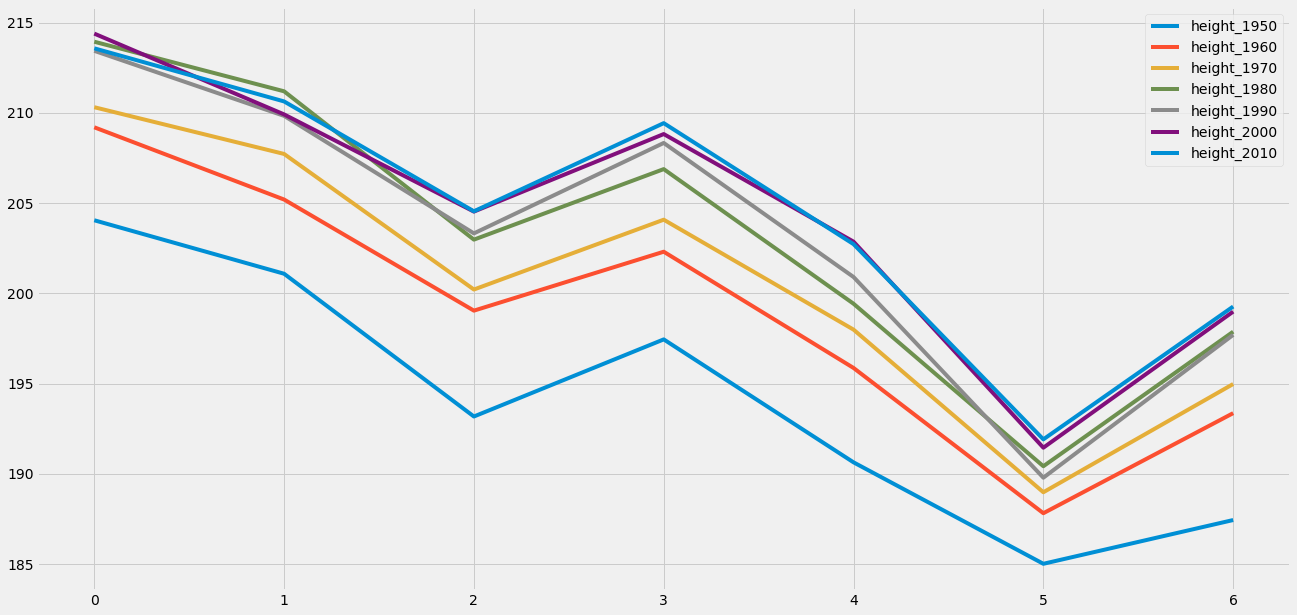

In [70]:
players_h.plot(figsize = (20, 10))

In [55]:
players_w = reduce(lambda x,y: pd.merge(x,y, on='position', how='outer'), [players_1950_2, players_1960_2, players_1970_2, players_1980_2, players_1990_2, players_2000_2, players_2010_2])
players_w.columns = ['position','weight_1950','weight_1960', 'weight_1970', 'weight_1980', 'weight_1990', 'weight_2000', 'weight_2010']
players_w

,position,weight_1950,weight_1960,weight_1970,weight_1980,weight_1990,weight_2000,weight_2010
0,C,222.254902,229.702128,229.781818,238.600000,253.890000,256.849057,256.197183
1,C-F,214.062500,224.285714,223.100000,232.794118,244.722222,251.428571,244.481481
2,F,195.863636,209.676923,209.791878,215.458333,226.132075,231.390909,227.831731
3,F-C,205.075949,218.705882,214.963636,223.449275,233.120000,246.714286,244.571429
4,F-G,190.672414,203.481481,201.815789,205.682927,212.714286,216.666667,218.437500
5,G,177.348485,182.458065,181.522634,183.497630,187.366667,195.155102,195.610714
6,G-F,182.620690,196.625000,190.782609,197.756098,206.020833,211.276596,209.490196


In [56]:
players_h_tr = players_h.transpose()
players_h_tr

,0,1,2,3,4,5,6
position,C,C-F,F,F-C,F-G,G,G-F
height_1950,204.047,201.083,193.172,197.445,190.631,185.009,187.434
height_1960,209.199,205.196,199.038,202.304,195.862,187.813,193.357
height_1970,210.312,207.721,200.209,204.077,197.986,188.974,194.973
height_1980,213.941,211.194,202.973,206.881,199.421,190.416,197.872
height_1990,213.436,209.832,203.32,208.331,200.902,189.78,197.697
height_2000,214.39,209.913,204.528,208.824,202.861,191.443,198.985
height_2010,213.575,210.632,204.543,209.429,202.724,191.906,199.265


In [57]:
players_h_tr.columns = ['C', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F']
players_h_tr = players_h_tr.iloc[1: , :]
players_h_tr

,C,C-F,F,F-C,F-G,G,G-F
height_1950,204.047,201.083,193.172,197.445,190.631,185.009,187.434
height_1960,209.199,205.196,199.038,202.304,195.862,187.813,193.357
height_1970,210.312,207.721,200.209,204.077,197.986,188.974,194.973
height_1980,213.941,211.194,202.973,206.881,199.421,190.416,197.872
height_1990,213.436,209.832,203.32,208.331,200.902,189.78,197.697
height_2000,214.39,209.913,204.528,208.824,202.861,191.443,198.985
height_2010,213.575,210.632,204.543,209.429,202.724,191.906,199.265


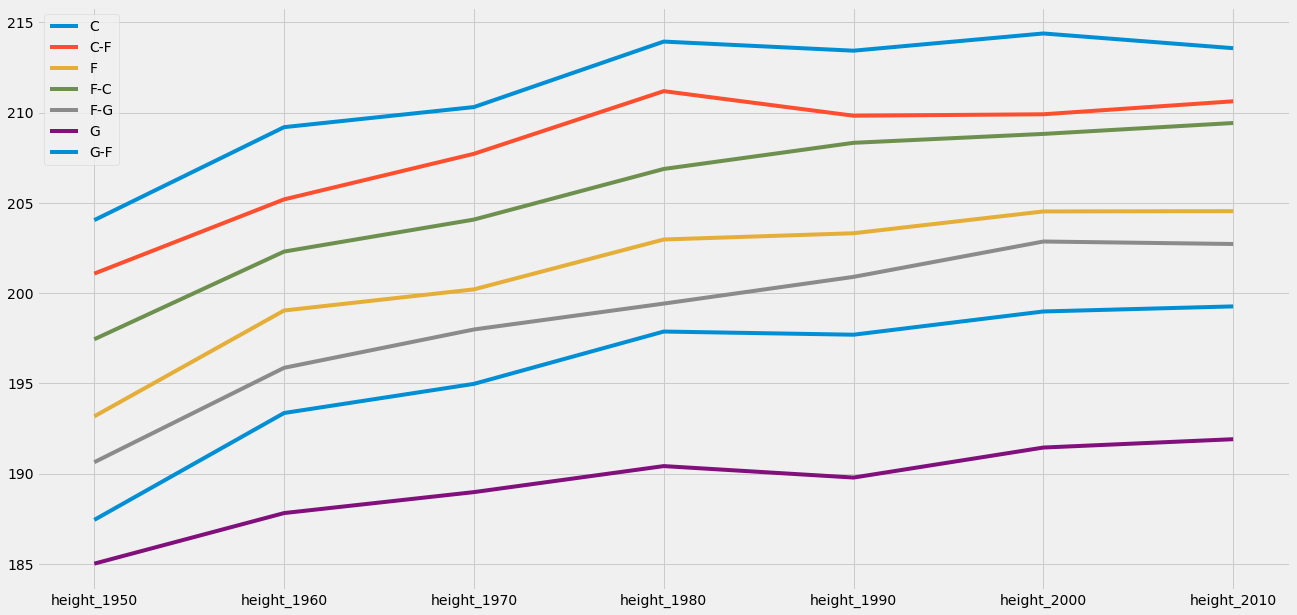

In [71]:
players_h_tr.plot(figsize = (20, 10));

In [72]:
players_w_tr = players_w.transpose()
players_w_tr.columns = ['C', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F']
players_w_tr = players_w_tr.iloc[1: , :]
players_w_tr

,C,C-F,F,F-C,F-G,G,G-F
weight_1950,222.255,214.062,195.864,205.076,190.672,177.348,182.621
weight_1960,229.702,224.286,209.677,218.706,203.481,182.458,196.625
weight_1970,229.782,223.1,209.792,214.964,201.816,181.523,190.783
weight_1980,238.6,232.794,215.458,223.449,205.683,183.498,197.756
weight_1990,253.89,244.722,226.132,233.12,212.714,187.367,206.021
weight_2000,256.849,251.429,231.391,246.714,216.667,195.155,211.277
weight_2010,256.197,244.481,227.832,244.571,218.438,195.611,209.49


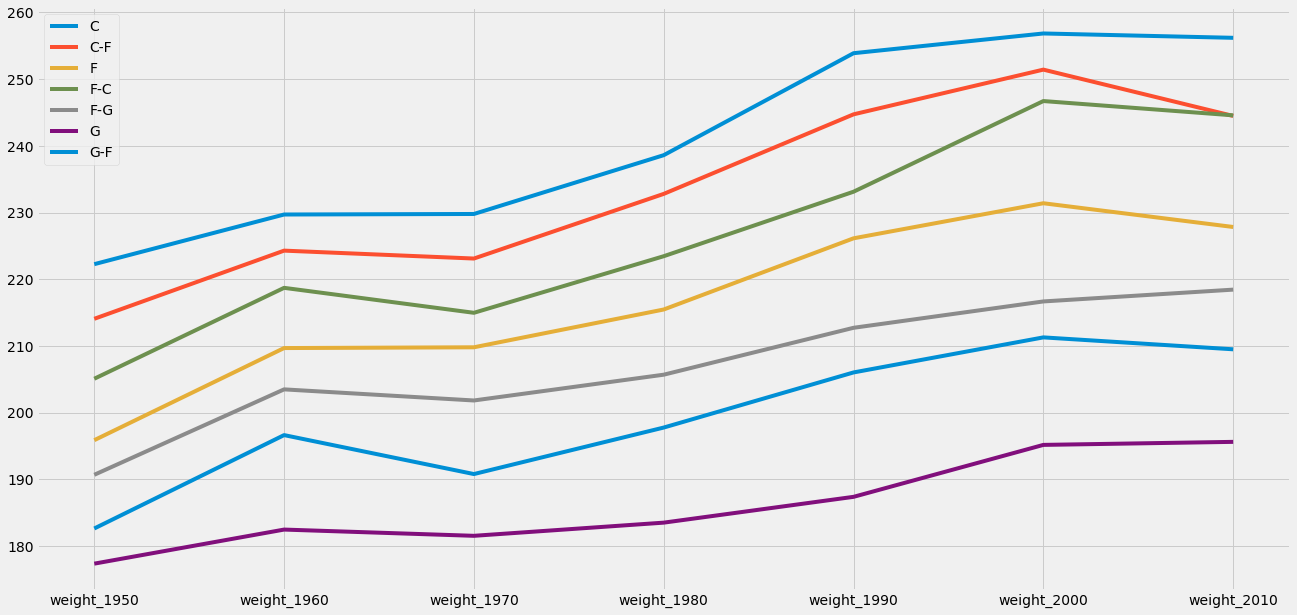

In [73]:
players_w_tr.plot(figsize = (20, 10));

In [61]:
pacedata = pd.read_csv('pacedata.csv')

In [62]:
pacedata

,Decades,Average_Pace
0,1950,106.24
1,1960,120.44
2,1970,107.77
3,1980,102.20
4,1990,93.34
5,2000,91.32
6,2010,95.30


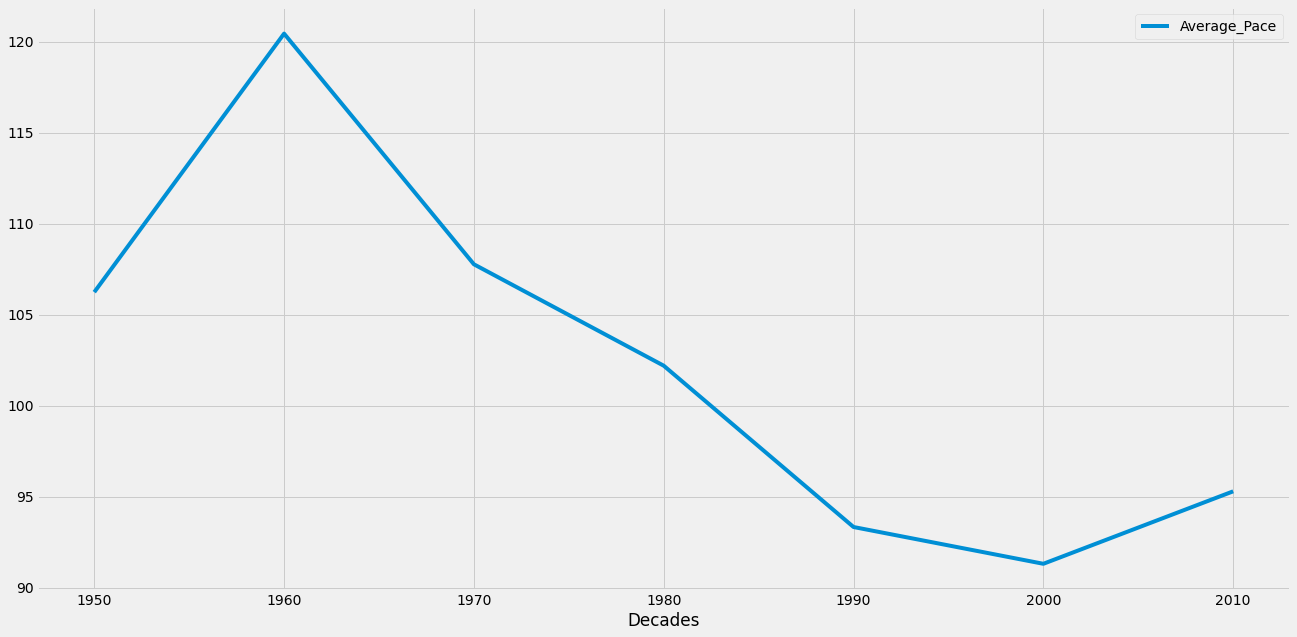

In [63]:
pacedata.plot('Decades', 'Average_Pace', figsize = (20, 10));

In [64]:
pace = pd.read_excel("NBA_pace_decades.xlsx")

In [65]:
pace

,year,pace,champ_pace
0,1950,97.4,92.3
1,1951,95.1,97.2
2,1952,92.4,93.7
3,1953,90.0,93.5
4,1954,102.9,103.6
...,...,...,...
67,2017,97.3,99.6
68,2018,100.0,100.2
69,2019,100.3,100.9
70,2020,99.2,102.2


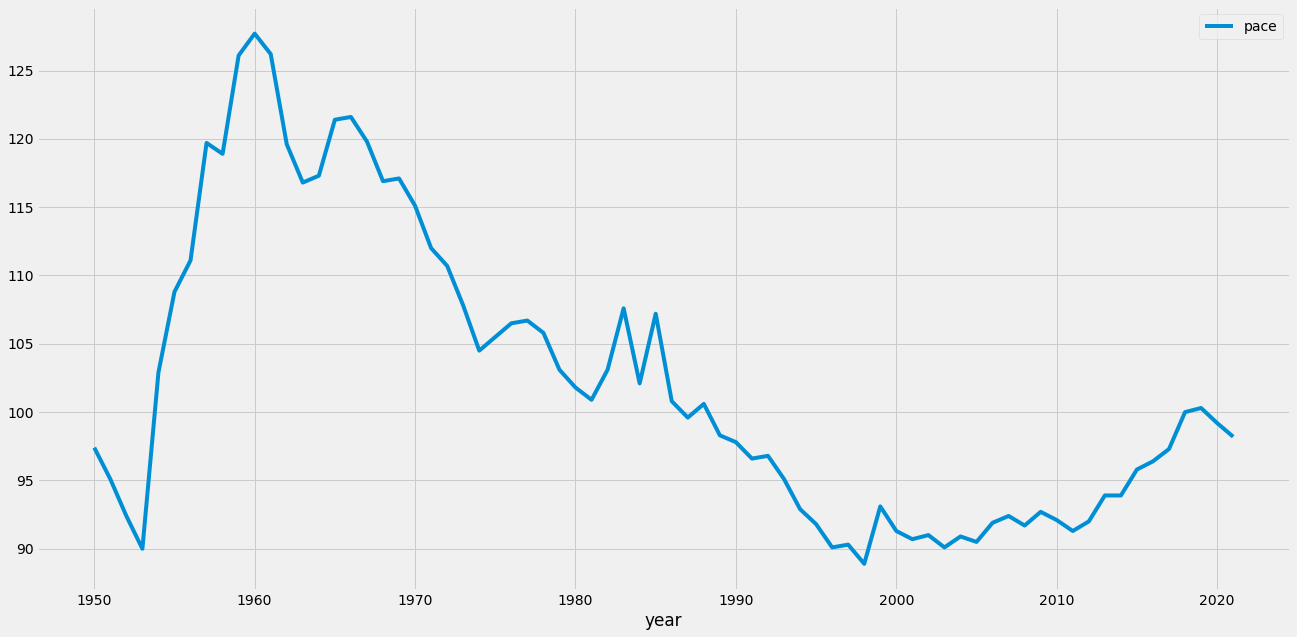

In [66]:
pace.plot('year', 'pace', figsize = (20, 10));

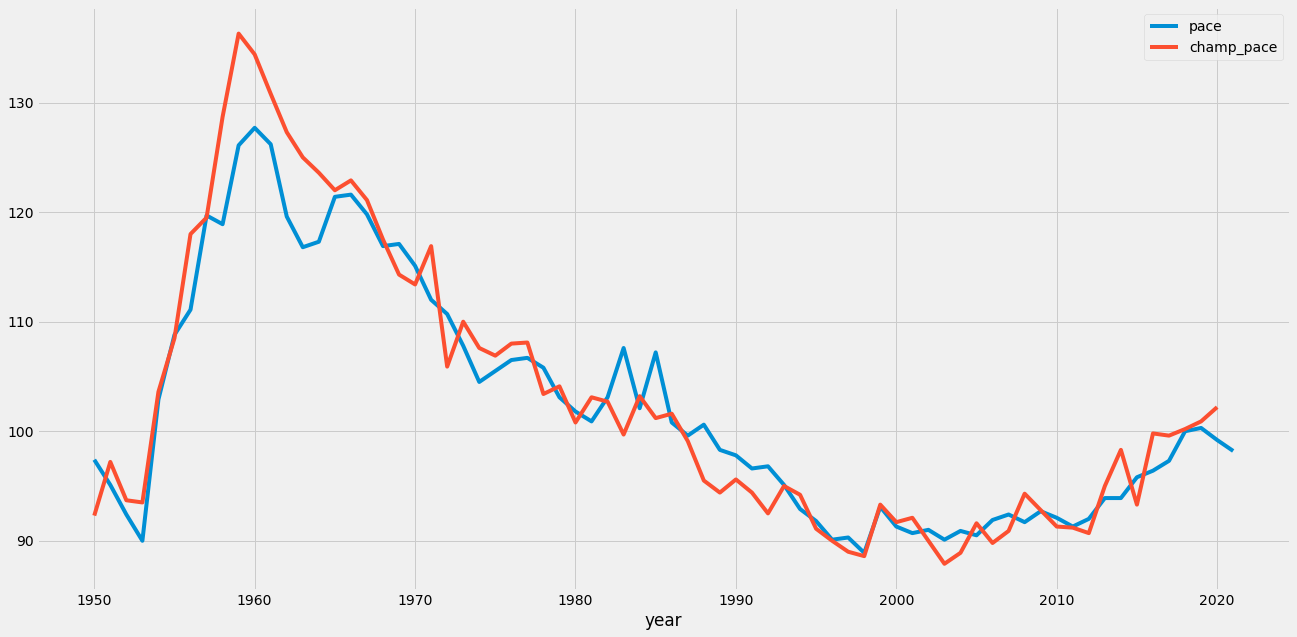

In [67]:
pace.set_index('year').plot(figsize = (20, 10));